<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 1.0091910	total: 62.1ms	remaining: 1m 2s
1:	learn: 0.9894059	total: 64.6ms	remaining: 32.2s
2:	learn: 0.9671817	total: 67ms	remaining: 22.3s
3:	learn: 0.9497985	total: 69.4ms	remaining: 17.3s
4:	learn: 0.9318251	total: 72.1ms	remaining: 14.4s
5:	learn: 0.9127227	total: 77.9ms	remaining: 12.9s
6:	learn: 0.8952216	total: 81.1ms	remaining: 11.5s
7:	learn: 0.8784257	total: 84.7ms	remaining: 10.5s
8:	learn: 0.8614136	total: 88.2ms	remaining: 9.71s
9:	learn: 0.8438013	total: 91.9ms	remaining: 9.1s
10:	learn: 0.8272774	total: 94.2ms	remaining: 8.47s
11:	learn: 0.8101300	total: 97.4ms	remaining: 8.02s
12:	learn: 0.7950426	total: 99.7ms	remaining: 7.57s
13:	learn: 0.7797288	total: 103ms	remaining: 7.25s
14:	learn: 0.7672158	total: 108ms	remaining: 7.1s
15:	learn: 0.7521895	total: 111ms	remaining: 6.82s
16:	learn: 0.7395537	total: 114ms	remaining: 6.57s
17:	learn: 0.7268917	total: 116ms	remaining: 6.34s
18:	learn: 0.7133896	total: 119ms	remaining: 6.13s
19:

35:	learn: 0.5414970	total: 167ms	remaining: 4.46s
36:	learn: 0.5348412	total: 170ms	remaining: 4.41s
37:	learn: 0.5275888	total: 172ms	remaining: 4.35s
38:	learn: 0.5196592	total: 174ms	remaining: 4.3s
39:	learn: 0.5105174	total: 178ms	remaining: 4.27s
40:	learn: 0.5042699	total: 180ms	remaining: 4.21s
41:	learn: 0.4969342	total: 183ms	remaining: 4.17s
42:	learn: 0.4914230	total: 185ms	remaining: 4.12s
43:	learn: 0.4859420	total: 188ms	remaining: 4.08s
44:	learn: 0.4796120	total: 190ms	remaining: 4.04s
45:	learn: 0.4743431	total: 193ms	remaining: 4s
46:	learn: 0.4682060	total: 196ms	remaining: 3.97s
47:	learn: 0.4614621	total: 198ms	remaining: 3.94s
48:	learn: 0.4563598	total: 201ms	remaining: 3.9s
49:	learn: 0.4521499	total: 204ms	remaining: 3.87s
50:	learn: 0.4468435	total: 206ms	remaining: 3.84s
51:	learn: 0.4427615	total: 208ms	remaining: 3.8s
52:	learn: 0.4376733	total: 211ms	remaining: 3.77s
53:	learn: 0.4335492	total: 214ms	remaining: 3.74s
54:	learn: 0.4291866	total: 216ms	rem

97:	learn: 0.3058218	total: 331ms	remaining: 3.05s
98:	learn: 0.3044427	total: 334ms	remaining: 3.04s
99:	learn: 0.3029867	total: 337ms	remaining: 3.03s
100:	learn: 0.3012935	total: 340ms	remaining: 3.03s
101:	learn: 0.2995198	total: 342ms	remaining: 3.02s
102:	learn: 0.2982062	total: 345ms	remaining: 3.01s
103:	learn: 0.2962821	total: 348ms	remaining: 3s
104:	learn: 0.2944227	total: 350ms	remaining: 2.99s
105:	learn: 0.2932699	total: 353ms	remaining: 2.98s
106:	learn: 0.2920267	total: 356ms	remaining: 2.97s
107:	learn: 0.2906351	total: 359ms	remaining: 2.96s
108:	learn: 0.2898611	total: 361ms	remaining: 2.95s
109:	learn: 0.2884422	total: 364ms	remaining: 2.94s
110:	learn: 0.2872769	total: 366ms	remaining: 2.94s
111:	learn: 0.2855487	total: 369ms	remaining: 2.93s
112:	learn: 0.2842448	total: 372ms	remaining: 2.92s
113:	learn: 0.2830445	total: 374ms	remaining: 2.91s
114:	learn: 0.2817900	total: 377ms	remaining: 2.9s
115:	learn: 0.2805367	total: 379ms	remaining: 2.89s
116:	learn: 0.27911

155:	learn: 0.2424523	total: 501ms	remaining: 2.71s
156:	learn: 0.2417561	total: 507ms	remaining: 2.72s
157:	learn: 0.2411739	total: 510ms	remaining: 2.72s
158:	learn: 0.2401606	total: 513ms	remaining: 2.71s
159:	learn: 0.2391885	total: 515ms	remaining: 2.7s
160:	learn: 0.2386376	total: 518ms	remaining: 2.7s
161:	learn: 0.2378683	total: 520ms	remaining: 2.69s
162:	learn: 0.2372362	total: 523ms	remaining: 2.69s
163:	learn: 0.2366350	total: 526ms	remaining: 2.68s
164:	learn: 0.2360214	total: 528ms	remaining: 2.67s
165:	learn: 0.2353196	total: 531ms	remaining: 2.67s
166:	learn: 0.2345570	total: 536ms	remaining: 2.67s
167:	learn: 0.2339594	total: 542ms	remaining: 2.69s
168:	learn: 0.2333403	total: 545ms	remaining: 2.68s
169:	learn: 0.2326904	total: 547ms	remaining: 2.67s
170:	learn: 0.2324232	total: 550ms	remaining: 2.67s
171:	learn: 0.2316873	total: 553ms	remaining: 2.66s
172:	learn: 0.2312091	total: 554ms	remaining: 2.65s
173:	learn: 0.2305707	total: 557ms	remaining: 2.64s
174:	learn: 0.

220:	learn: 0.2009819	total: 675ms	remaining: 2.38s
221:	learn: 0.2006847	total: 677ms	remaining: 2.37s
222:	learn: 0.2001821	total: 680ms	remaining: 2.37s
223:	learn: 0.1996373	total: 682ms	remaining: 2.36s
224:	learn: 0.1989301	total: 684ms	remaining: 2.36s
225:	learn: 0.1984140	total: 686ms	remaining: 2.35s
226:	learn: 0.1981279	total: 688ms	remaining: 2.34s
227:	learn: 0.1975149	total: 690ms	remaining: 2.34s
228:	learn: 0.1970026	total: 692ms	remaining: 2.33s
229:	learn: 0.1963257	total: 694ms	remaining: 2.32s
230:	learn: 0.1955115	total: 696ms	remaining: 2.32s
231:	learn: 0.1949612	total: 698ms	remaining: 2.31s
232:	learn: 0.1944019	total: 700ms	remaining: 2.3s
233:	learn: 0.1936877	total: 703ms	remaining: 2.3s
234:	learn: 0.1930587	total: 705ms	remaining: 2.3s
235:	learn: 0.1924748	total: 708ms	remaining: 2.29s
236:	learn: 0.1918835	total: 710ms	remaining: 2.28s
237:	learn: 0.1913093	total: 712ms	remaining: 2.28s
238:	learn: 0.1909090	total: 715ms	remaining: 2.27s
239:	learn: 0.1

297:	learn: 0.1634302	total: 853ms	remaining: 2.01s
298:	learn: 0.1629303	total: 856ms	remaining: 2.01s
299:	learn: 0.1624799	total: 858ms	remaining: 2s
300:	learn: 0.1622274	total: 860ms	remaining: 2s
301:	learn: 0.1617838	total: 863ms	remaining: 1.99s
302:	learn: 0.1615299	total: 866ms	remaining: 1.99s
303:	learn: 0.1610100	total: 869ms	remaining: 1.99s
304:	learn: 0.1607355	total: 871ms	remaining: 1.98s
305:	learn: 0.1604270	total: 874ms	remaining: 1.98s
306:	learn: 0.1601115	total: 877ms	remaining: 1.98s
307:	learn: 0.1597604	total: 879ms	remaining: 1.98s
308:	learn: 0.1591350	total: 884ms	remaining: 1.98s
309:	learn: 0.1586840	total: 888ms	remaining: 1.98s
310:	learn: 0.1582144	total: 892ms	remaining: 1.98s
311:	learn: 0.1578742	total: 894ms	remaining: 1.97s
312:	learn: 0.1576370	total: 897ms	remaining: 1.97s
313:	learn: 0.1572027	total: 899ms	remaining: 1.96s
314:	learn: 0.1568296	total: 902ms	remaining: 1.96s
315:	learn: 0.1564520	total: 904ms	remaining: 1.96s
316:	learn: 0.1560

354:	learn: 0.1439762	total: 1.03s	remaining: 1.86s
355:	learn: 0.1435655	total: 1.03s	remaining: 1.86s
356:	learn: 0.1432770	total: 1.03s	remaining: 1.86s
357:	learn: 0.1429111	total: 1.03s	remaining: 1.85s
358:	learn: 0.1426061	total: 1.04s	remaining: 1.85s
359:	learn: 0.1422270	total: 1.04s	remaining: 1.85s
360:	learn: 0.1419408	total: 1.04s	remaining: 1.84s
361:	learn: 0.1418022	total: 1.04s	remaining: 1.84s
362:	learn: 0.1415518	total: 1.05s	remaining: 1.84s
363:	learn: 0.1411658	total: 1.05s	remaining: 1.84s
364:	learn: 0.1408955	total: 1.06s	remaining: 1.84s
365:	learn: 0.1405796	total: 1.06s	remaining: 1.83s
366:	learn: 0.1403145	total: 1.06s	remaining: 1.83s
367:	learn: 0.1400867	total: 1.06s	remaining: 1.83s
368:	learn: 0.1397088	total: 1.07s	remaining: 1.82s
369:	learn: 0.1396247	total: 1.07s	remaining: 1.82s
370:	learn: 0.1394518	total: 1.07s	remaining: 1.81s
371:	learn: 0.1391166	total: 1.07s	remaining: 1.81s
372:	learn: 0.1388824	total: 1.08s	remaining: 1.81s
373:	learn: 

421:	learn: 0.1241741	total: 1.2s	remaining: 1.65s
422:	learn: 0.1239139	total: 1.21s	remaining: 1.65s
423:	learn: 0.1237284	total: 1.21s	remaining: 1.65s
424:	learn: 0.1234363	total: 1.21s	remaining: 1.64s
425:	learn: 0.1231212	total: 1.22s	remaining: 1.64s
426:	learn: 0.1229517	total: 1.22s	remaining: 1.64s
427:	learn: 0.1226496	total: 1.23s	remaining: 1.64s
428:	learn: 0.1223765	total: 1.25s	remaining: 1.66s
429:	learn: 0.1221214	total: 1.25s	remaining: 1.66s
430:	learn: 0.1219674	total: 1.33s	remaining: 1.76s
431:	learn: 0.1217893	total: 1.33s	remaining: 1.76s
432:	learn: 0.1215727	total: 1.34s	remaining: 1.75s
433:	learn: 0.1212379	total: 1.34s	remaining: 1.75s
434:	learn: 0.1208933	total: 1.34s	remaining: 1.75s
435:	learn: 0.1205558	total: 1.35s	remaining: 1.74s
436:	learn: 0.1203053	total: 1.35s	remaining: 1.74s
437:	learn: 0.1201548	total: 1.35s	remaining: 1.74s


438:	learn: 0.1199085	total: 1.36s	remaining: 1.74s
439:	learn: 0.1196419	total: 1.37s	remaining: 1.74s
440:	learn: 0.1192780	total: 1.38s	remaining: 1.75s
441:	learn: 0.1191061	total: 1.38s	remaining: 1.74s
442:	learn: 0.1189757	total: 1.38s	remaining: 1.74s
443:	learn: 0.1188164	total: 1.39s	remaining: 1.74s
444:	learn: 0.1185216	total: 1.39s	remaining: 1.73s
445:	learn: 0.1183205	total: 1.39s	remaining: 1.73s
446:	learn: 0.1180055	total: 1.39s	remaining: 1.73s
447:	learn: 0.1176994	total: 1.4s	remaining: 1.72s
448:	learn: 0.1174688	total: 1.4s	remaining: 1.72s
449:	learn: 0.1172888	total: 1.4s	remaining: 1.71s
450:	learn: 0.1171364	total: 1.41s	remaining: 1.71s
451:	learn: 0.1167942	total: 1.41s	remaining: 1.71s
452:	learn: 0.1165063	total: 1.41s	remaining: 1.7s
453:	learn: 0.1163079	total: 1.41s	remaining: 1.7s
454:	learn: 0.1160621	total: 1.42s	remaining: 1.7s
455:	learn: 0.1159187	total: 1.43s	remaining: 1.7s
456:	learn: 0.1157296	total: 1.43s	remaining: 1.7s
457:	learn: 0.115531

487:	learn: 0.1098206	total: 1.52s	remaining: 1.6s
488:	learn: 0.1095846	total: 1.53s	remaining: 1.6s
489:	learn: 0.1094428	total: 1.53s	remaining: 1.59s
490:	learn: 0.1093512	total: 1.53s	remaining: 1.59s
491:	learn: 0.1092190	total: 1.54s	remaining: 1.59s
492:	learn: 0.1090430	total: 1.54s	remaining: 1.58s
493:	learn: 0.1088559	total: 1.54s	remaining: 1.58s
494:	learn: 0.1085829	total: 1.54s	remaining: 1.58s
495:	learn: 0.1084684	total: 1.55s	remaining: 1.57s
496:	learn: 0.1083193	total: 1.55s	remaining: 1.57s
497:	learn: 0.1081980	total: 1.55s	remaining: 1.56s
498:	learn: 0.1081037	total: 1.55s	remaining: 1.56s
499:	learn: 0.1078928	total: 1.56s	remaining: 1.56s
500:	learn: 0.1075808	total: 1.56s	remaining: 1.55s
501:	learn: 0.1073374	total: 1.56s	remaining: 1.55s
502:	learn: 0.1072720	total: 1.56s	remaining: 1.55s
503:	learn: 0.1071100	total: 1.57s	remaining: 1.54s
504:	learn: 0.1068562	total: 1.57s	remaining: 1.54s
505:	learn: 0.1067150	total: 1.57s	remaining: 1.54s
506:	learn: 0.

557:	learn: 0.0974386	total: 1.71s	remaining: 1.35s
558:	learn: 0.0973946	total: 1.71s	remaining: 1.35s
559:	learn: 0.0972172	total: 1.71s	remaining: 1.35s
560:	learn: 0.0970812	total: 1.72s	remaining: 1.34s
561:	learn: 0.0968545	total: 1.72s	remaining: 1.34s
562:	learn: 0.0966852	total: 1.72s	remaining: 1.33s
563:	learn: 0.0966385	total: 1.72s	remaining: 1.33s
564:	learn: 0.0965815	total: 1.72s	remaining: 1.32s
565:	learn: 0.0964855	total: 1.72s	remaining: 1.32s
566:	learn: 0.0962452	total: 1.73s	remaining: 1.32s
567:	learn: 0.0961544	total: 1.73s	remaining: 1.31s
568:	learn: 0.0959167	total: 1.73s	remaining: 1.31s
569:	learn: 0.0956774	total: 1.73s	remaining: 1.31s
570:	learn: 0.0955592	total: 1.73s	remaining: 1.3s
571:	learn: 0.0954134	total: 1.74s	remaining: 1.3s
572:	learn: 0.0953156	total: 1.74s	remaining: 1.3s
573:	learn: 0.0950135	total: 1.74s	remaining: 1.29s
574:	learn: 0.0947349	total: 1.75s	remaining: 1.29s
575:	learn: 0.0947067	total: 1.75s	remaining: 1.29s
576:	learn: 0.0

629:	learn: 0.0866406	total: 1.89s	remaining: 1.11s
630:	learn: 0.0865188	total: 1.89s	remaining: 1.1s
631:	learn: 0.0864836	total: 1.89s	remaining: 1.1s
632:	learn: 0.0863582	total: 1.9s	remaining: 1.1s
633:	learn: 0.0861755	total: 1.9s	remaining: 1.09s
634:	learn: 0.0860345	total: 1.9s	remaining: 1.09s
635:	learn: 0.0858956	total: 1.9s	remaining: 1.09s
636:	learn: 0.0856392	total: 1.91s	remaining: 1.08s
637:	learn: 0.0855021	total: 1.91s	remaining: 1.08s
638:	learn: 0.0854363	total: 1.91s	remaining: 1.08s
639:	learn: 0.0853410	total: 1.91s	remaining: 1.07s
640:	learn: 0.0851630	total: 1.91s	remaining: 1.07s
641:	learn: 0.0849848	total: 1.92s	remaining: 1.07s
642:	learn: 0.0848010	total: 1.92s	remaining: 1.06s
643:	learn: 0.0846246	total: 1.92s	remaining: 1.06s
644:	learn: 0.0845411	total: 1.93s	remaining: 1.06s
645:	learn: 0.0843816	total: 1.93s	remaining: 1.06s
646:	learn: 0.0842376	total: 1.93s	remaining: 1.05s
647:	learn: 0.0840632	total: 1.93s	remaining: 1.05s
648:	learn: 0.08401

711:	learn: 0.0764908	total: 2.06s	remaining: 835ms
712:	learn: 0.0763514	total: 2.07s	remaining: 833ms
713:	learn: 0.0762474	total: 2.07s	remaining: 830ms
714:	learn: 0.0761788	total: 2.07s	remaining: 827ms
715:	learn: 0.0759951	total: 2.08s	remaining: 824ms
716:	learn: 0.0758304	total: 2.08s	remaining: 821ms
717:	learn: 0.0756403	total: 2.08s	remaining: 818ms
718:	learn: 0.0755054	total: 2.08s	remaining: 815ms
719:	learn: 0.0753606	total: 2.09s	remaining: 811ms
720:	learn: 0.0752830	total: 2.09s	remaining: 808ms
721:	learn: 0.0751678	total: 2.09s	remaining: 805ms
722:	learn: 0.0749860	total: 2.09s	remaining: 802ms
723:	learn: 0.0749270	total: 2.1s	remaining: 800ms
724:	learn: 0.0747467	total: 2.1s	remaining: 797ms
725:	learn: 0.0747329	total: 2.1s	remaining: 794ms
726:	learn: 0.0745952	total: 2.11s	remaining: 791ms
727:	learn: 0.0745074	total: 2.11s	remaining: 788ms
728:	learn: 0.0743602	total: 2.11s	remaining: 786ms
729:	learn: 0.0741861	total: 2.12s	remaining: 783ms
730:	learn: 0.0

754:	learn: 0.0713326	total: 2.22s	remaining: 720ms
755:	learn: 0.0712506	total: 2.22s	remaining: 717ms
756:	learn: 0.0711833	total: 2.23s	remaining: 714ms
757:	learn: 0.0710862	total: 2.23s	remaining: 711ms
758:	learn: 0.0710064	total: 2.23s	remaining: 708ms
759:	learn: 0.0709145	total: 2.23s	remaining: 705ms
760:	learn: 0.0707795	total: 2.23s	remaining: 702ms
761:	learn: 0.0706163	total: 2.24s	remaining: 699ms
762:	learn: 0.0704999	total: 2.24s	remaining: 696ms
763:	learn: 0.0704161	total: 2.24s	remaining: 693ms
764:	learn: 0.0703657	total: 2.25s	remaining: 690ms
765:	learn: 0.0703138	total: 2.25s	remaining: 687ms
766:	learn: 0.0701726	total: 2.25s	remaining: 684ms
767:	learn: 0.0700614	total: 2.25s	remaining: 681ms
768:	learn: 0.0699090	total: 2.26s	remaining: 678ms
769:	learn: 0.0697396	total: 2.26s	remaining: 675ms
770:	learn: 0.0697189	total: 2.26s	remaining: 672ms
771:	learn: 0.0696267	total: 2.26s	remaining: 669ms
772:	learn: 0.0695575	total: 2.27s	remaining: 665ms
773:	learn: 

820:	learn: 0.0649091	total: 2.4s	remaining: 524ms
821:	learn: 0.0647797	total: 2.41s	remaining: 521ms
822:	learn: 0.0646627	total: 2.41s	remaining: 518ms
823:	learn: 0.0645089	total: 2.41s	remaining: 515ms
824:	learn: 0.0644123	total: 2.41s	remaining: 512ms
825:	learn: 0.0643264	total: 2.41s	remaining: 509ms
826:	learn: 0.0642344	total: 2.42s	remaining: 506ms
827:	learn: 0.0641216	total: 2.42s	remaining: 503ms
828:	learn: 0.0640805	total: 2.42s	remaining: 499ms
829:	learn: 0.0640144	total: 2.42s	remaining: 496ms
830:	learn: 0.0639143	total: 2.42s	remaining: 493ms
831:	learn: 0.0638304	total: 2.43s	remaining: 490ms
832:	learn: 0.0636402	total: 2.43s	remaining: 487ms
833:	learn: 0.0635024	total: 2.43s	remaining: 484ms
834:	learn: 0.0634107	total: 2.43s	remaining: 481ms
835:	learn: 0.0633783	total: 2.43s	remaining: 477ms
836:	learn: 0.0632370	total: 2.44s	remaining: 474ms
837:	learn: 0.0632281	total: 2.44s	remaining: 471ms
838:	learn: 0.0631572	total: 2.44s	remaining: 468ms
839:	learn: 0

898:	learn: 0.0582995	total: 2.58s	remaining: 290ms
899:	learn: 0.0582236	total: 2.58s	remaining: 287ms
900:	learn: 0.0580685	total: 2.59s	remaining: 284ms
901:	learn: 0.0579319	total: 2.59s	remaining: 281ms
902:	learn: 0.0578473	total: 2.59s	remaining: 278ms
903:	learn: 0.0578149	total: 2.59s	remaining: 275ms
904:	learn: 0.0578061	total: 2.6s	remaining: 273ms
905:	learn: 0.0577935	total: 2.6s	remaining: 270ms
906:	learn: 0.0577005	total: 2.6s	remaining: 267ms
907:	learn: 0.0575951	total: 2.6s	remaining: 264ms
908:	learn: 0.0575760	total: 2.6s	remaining: 261ms
909:	learn: 0.0575134	total: 2.6s	remaining: 258ms
910:	learn: 0.0574595	total: 2.61s	remaining: 255ms
911:	learn: 0.0574287	total: 2.61s	remaining: 252ms
912:	learn: 0.0573353	total: 2.61s	remaining: 249ms
913:	learn: 0.0572420	total: 2.61s	remaining: 246ms
914:	learn: 0.0571793	total: 2.62s	remaining: 243ms
915:	learn: 0.0570777	total: 2.62s	remaining: 240ms
916:	learn: 0.0570209	total: 2.62s	remaining: 237ms
917:	learn: 0.0569

980:	learn: 0.0525432	total: 2.76s	remaining: 53.5ms
981:	learn: 0.0525382	total: 2.76s	remaining: 50.7ms
982:	learn: 0.0524473	total: 2.77s	remaining: 47.9ms
983:	learn: 0.0524412	total: 2.77s	remaining: 45ms
984:	learn: 0.0523274	total: 2.77s	remaining: 42.2ms
985:	learn: 0.0522264	total: 2.77s	remaining: 39.4ms
986:	learn: 0.0521126	total: 2.78s	remaining: 36.6ms
987:	learn: 0.0520474	total: 2.78s	remaining: 33.8ms
988:	learn: 0.0519865	total: 2.78s	remaining: 31ms
989:	learn: 0.0519367	total: 2.79s	remaining: 28.1ms
990:	learn: 0.0519234	total: 2.79s	remaining: 25.3ms
991:	learn: 0.0518660	total: 2.79s	remaining: 22.5ms
992:	learn: 0.0518051	total: 2.79s	remaining: 19.7ms
993:	learn: 0.0516950	total: 2.79s	remaining: 16.9ms
994:	learn: 0.0516108	total: 2.8s	remaining: 14.1ms
995:	learn: 0.0515223	total: 2.8s	remaining: 11.2ms
996:	learn: 0.0514340	total: 2.8s	remaining: 8.43ms
997:	learn: 0.0513894	total: 2.8s	remaining: 5.62ms
998:	learn: 0.0513286	total: 2.81s	remaining: 2.81ms
9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.19630081320801374
ABC Pre-generator MAE 1.18901588060155


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

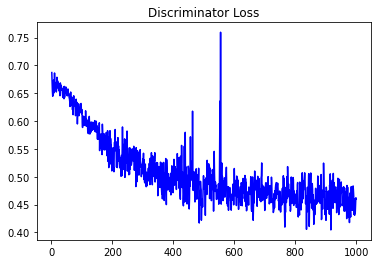

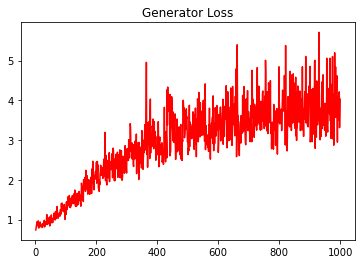

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.278567272867798


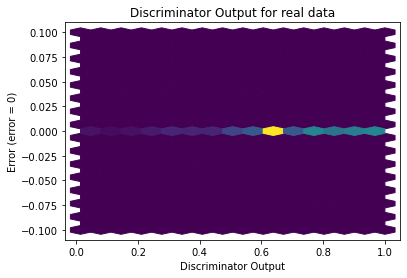

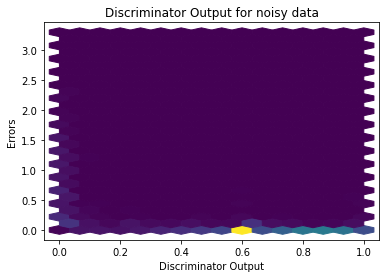

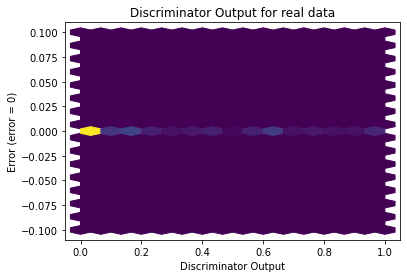

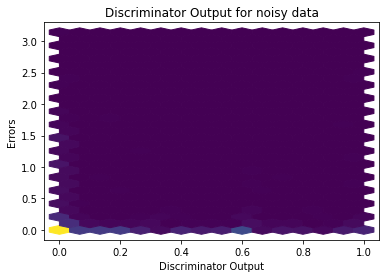

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())